# 데이터사이언스 프로젝트 - 2조

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

### 데이터 정제
[데이터 설명]
- 데이터: 2023년 따릉이 대여 데이터 + 1시간 단위 날씨 데이터 + 1시간 평균 미세먼지농도 데이터

- 종속변수: 이용건수
  
- 독립변수
<br>시간대: 0-5시: 1, 6-11시: 2, 12-17시: 3, 18-23시: 4
<br>대여소번호: 대여-반납 불균형 대여소 30개 (대여건수와 반납건수의 차이가 많은 순서대로 상위 30개)
<br>대여월: 1월-12월
<br>평일: 평일이면 1, 평일 아니면 0(공휴일, 주말)
<br>기온: 시간대 별 평균 기온(°C)
<br>강수량: 시간대 별 평균 강수량(mm)
<br>풍속: 시간대 별 평균 풍속(m/s)
<br>습도: 시간대 별 평균 습도(%)
<br>적설: 시간대 별 평균 눈이 쌓인 정도(cm)
<br>미세먼지농도: 시간대 별 평균 미세먼지농도(㎍/㎥)

In [2]:
### 날씨 데이터
weather = pd.read_csv('2023년 날씨+미세먼지정보_결측치 제거.csv', encoding='cp949')

In [3]:
weather

,날짜,시간대,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),1시간평균 미세먼지농도(㎍/㎥)
0,2023-01-01,0,0.9,0.0,1.4,72,0.0,63.0
1,2023-01-01,1,1.5,0.0,1.9,71,0.0,67.0
2,2023-01-01,2,1.5,0.0,1.9,72,0.0,84.0
3,2023-01-01,3,1.6,0.0,1.6,74,0.0,82.0
4,2023-01-01,4,1.5,0.0,1.4,74,0.0,87.0
...,...,...,...,...,...,...,...,...
8755,2023-12-31,19,2.6,0.0,0.8,90,2.4,19.0
8756,2023-12-31,20,1.9,0.0,2.2,94,2.4,26.0
8757,2023-12-31,21,1.7,0.0,2.4,96,2.4,30.0
8758,2023-12-31,22,1.3,0.0,0.6,95,2.4,31.0


In [4]:
# 4개의 시간대로 날씨 데이터 분할
one = weather[weather['시간대'].isin([0, 1, 2, 3, 4, 5])] #0~5시
two = weather[weather['시간대'].isin([6, 7, 8, 9, 10, 11])] #6~11시
three = weather[weather['시간대'].isin([12, 13, 14, 15, 16, 17])] #12~17시
four = weather[weather['시간대'].isin([18, 19, 20, 21, 22, 23])] #18~23시

In [5]:
# 날짜 별로 그룹핑해서 각 변수의 평균값 구하고, 시간대 새로 지정
one = one.groupby('날짜').mean().reset_index()
one['시간대'] = 1
two = two.groupby('날짜').mean().reset_index()
two['시간대'] = 2
three = three.groupby('날짜').mean().reset_index()
three['시간대'] = 3
four = four.groupby('날짜').mean().reset_index()
four['시간대'] = 4

In [6]:
# 각각의 시간대 별 데이터 병합
mean_weather = pd.concat([one, two, three, four], ignore_index=True)
mean_weather.rename(columns = {'날짜':'대여일자', '1시간평균 미세먼지농도(㎍/㎥)':'미세먼지농도(㎍/㎥)'}, inplace=True)
mean_weather

,대여일자,시간대,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),미세먼지농도(㎍/㎥)
0,2023-01-01,1,1.300000,0.00,1.766667,70.833333,0.000000,76.833333
1,2023-01-02,1,-5.733333,0.00,2.066667,51.000000,0.000000,19.166667
2,2023-01-03,1,-7.683333,0.00,1.800000,57.666667,0.000000,27.666667
3,2023-01-04,1,-5.233333,0.00,1.483333,54.000000,0.000000,31.166667
4,2023-01-05,1,-3.833333,0.00,1.250000,64.166667,0.000000,40.166667
...,...,...,...,...,...,...,...,...
1455,2023-12-27,4,2.400000,0.00,1.283333,72.333333,0.000000,76.000000
1456,2023-12-28,4,1.483333,0.00,1.283333,62.166667,0.000000,23.666667
1457,2023-12-29,4,1.833333,0.00,1.800000,70.166667,0.000000,34.000000
1458,2023-12-30,4,1.483333,0.15,3.633333,97.000000,10.683333,21.500000


In [7]:
### 따릉이 데이터
bike = pd.read_csv('2023년 대여소별 대여데이터.csv', index_col=0)

In [8]:
bike

,대여일자,대여시간,대여소번호,대여소명,이용건수,평일구분
0,2023-01-01,0,574,아차산역4번출구,0,평일 외
1,2023-01-01,1,574,아차산역4번출구,1,평일 외
2,2023-01-01,2,574,아차산역4번출구,0,평일 외
3,2023-01-01,3,574,아차산역4번출구,0,평일 외
4,2023-01-01,4,574,아차산역4번출구,0,평일 외
...,...,...,...,...,...,...
262795,2023-12-31,19,1175,대한항공 인력개발센터,0,평일 외
262796,2023-12-31,20,1175,대한항공 인력개발센터,1,평일 외
262797,2023-12-31,21,1175,대한항공 인력개발센터,2,평일 외
262798,2023-12-31,22,1175,대한항공 인력개발센터,0,평일 외


In [9]:
# 4개의 시간대로 따릉이 데이터 분할
bike['시간대'] = bike['대여시간'].map({0:1, 1:1, 2:1, 3:1, 4:1, 5:1, 
                                   6:2, 7:2, 8:2, 9:2, 10:2, 11:2, 
                                   12:3, 13:3, 14:3, 15:3, 16:3, 17:3, 
                                   18:4, 19:4, 20:4, 21:4, 22:4, 23:4})

bike = bike.drop('대여시간', axis=1) #대여시간 열 삭제

In [10]:
grouped = bike.groupby(['대여일자', '시간대', '평일구분', '대여소번호', '대여소명'])
new_bike = grouped['이용건수'].agg('sum').reset_index()
new_bike

,대여일자,시간대,평일구분,대여소번호,대여소명,이용건수
0,2023-01-01,1,평일 외,162,봉원고가차도 밑,2
1,2023-01-01,1,평일 외,207,여의나루역 1번출구 앞,9
2,2023-01-01,1,평일 외,213,KT앞,5
3,2023-01-01,1,평일 외,434,신당 래미안 버스정류장,4
4,2023-01-01,1,평일 외,474,동대문역사문화공원역 1번출구 뒤편,14
...,...,...,...,...,...,...
43795,2023-12-31,4,평일 외,3758,서울남부출입국관리소,3
43796,2023-12-31,4,평일 외,4009,월계프라자,0
43797,2023-12-31,4,평일 외,4221,솔리스타오피스텔(공덕동주민센터),1
43798,2023-12-31,4,평일 외,4591,신길자이아파트,2


In [11]:
### 날씨와 따릉이 데이터 병합
rental = pd.merge(mean_weather, new_bike, on=['대여일자', '시간대'], how='left')
rental

,대여일자,시간대,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),미세먼지농도(㎍/㎥),평일구분,대여소번호,대여소명,이용건수
0,2023-01-01,1,1.300000,0.0,1.766667,70.833333,0.000000,76.833333,평일 외,162,봉원고가차도 밑,2
1,2023-01-01,1,1.300000,0.0,1.766667,70.833333,0.000000,76.833333,평일 외,207,여의나루역 1번출구 앞,9
2,2023-01-01,1,1.300000,0.0,1.766667,70.833333,0.000000,76.833333,평일 외,213,KT앞,5
3,2023-01-01,1,1.300000,0.0,1.766667,70.833333,0.000000,76.833333,평일 외,434,신당 래미안 버스정류장,4
4,2023-01-01,1,1.300000,0.0,1.766667,70.833333,0.000000,76.833333,평일 외,474,동대문역사문화공원역 1번출구 뒤편,14
...,...,...,...,...,...,...,...,...,...,...,...,...
43795,2023-12-31,4,1.916667,0.0,1.250000,93.333333,2.416667,25.000000,평일 외,3758,서울남부출입국관리소,3
43796,2023-12-31,4,1.916667,0.0,1.250000,93.333333,2.416667,25.000000,평일 외,4009,월계프라자,0
43797,2023-12-31,4,1.916667,0.0,1.250000,93.333333,2.416667,25.000000,평일 외,4221,솔리스타오피스텔(공덕동주민센터),1
43798,2023-12-31,4,1.916667,0.0,1.250000,93.333333,2.416667,25.000000,평일 외,4591,신길자이아파트,2


In [12]:
### '월' 변수 만들기
rental['대여일자'] = pd.to_datetime(rental['대여일자'])
rental['대여월'] = rental['대여일자'].dt.month

### 평일구분 -> 평일로 바꾸기 (평일이면 1, 평일 아니면 0)
rental['평일'] = 0
rental['평일'] = np.where(rental['평일구분'] == '평일', 1, 0) 

### 필요없는 열 삭제
rental = rental.drop(['평일구분', '대여일자', '대여소명'], axis=1)

rental

,시간대,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),미세먼지농도(㎍/㎥),대여소번호,이용건수,대여월,평일
0,1,1.300000,0.0,1.766667,70.833333,0.000000,76.833333,162,2,1,0
1,1,1.300000,0.0,1.766667,70.833333,0.000000,76.833333,207,9,1,0
2,1,1.300000,0.0,1.766667,70.833333,0.000000,76.833333,213,5,1,0
3,1,1.300000,0.0,1.766667,70.833333,0.000000,76.833333,434,4,1,0
4,1,1.300000,0.0,1.766667,70.833333,0.000000,76.833333,474,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...
43795,4,1.916667,0.0,1.250000,93.333333,2.416667,25.000000,3758,3,12,0
43796,4,1.916667,0.0,1.250000,93.333333,2.416667,25.000000,4009,0,12,0
43797,4,1.916667,0.0,1.250000,93.333333,2.416667,25.000000,4221,1,12,0
43798,4,1.916667,0.0,1.250000,93.333333,2.416667,25.000000,4591,2,12,0


In [13]:
### 데이터 파일로 저장
rental.to_csv('2023년 따릉이 대여 및 날씨 데이터.csv', encoding='cp949')

<br>
<br>

### 탐색적 데이터 분석 (EDA)

In [14]:
df = pd.read_csv('2023년 따릉이 대여 및 날씨 데이터.csv', encoding='cp949', index_col=0)

In [15]:
df

,시간대,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),미세먼지농도(㎍/㎥),대여소번호,이용건수,대여월,평일
0,1,1.300000,0.0,1.766667,70.833333,0.000000,76.833333,162,2,1,0
1,1,1.300000,0.0,1.766667,70.833333,0.000000,76.833333,207,9,1,0
2,1,1.300000,0.0,1.766667,70.833333,0.000000,76.833333,213,5,1,0
3,1,1.300000,0.0,1.766667,70.833333,0.000000,76.833333,434,4,1,0
4,1,1.300000,0.0,1.766667,70.833333,0.000000,76.833333,474,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...
43795,4,1.916667,0.0,1.250000,93.333333,2.416667,25.000000,3758,3,12,0
43796,4,1.916667,0.0,1.250000,93.333333,2.416667,25.000000,4009,0,12,0
43797,4,1.916667,0.0,1.250000,93.333333,2.416667,25.000000,4221,1,12,0
43798,4,1.916667,0.0,1.250000,93.333333,2.416667,25.000000,4591,2,12,0


In [16]:
### 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43800 entries, 0 to 43799
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시간대          43800 non-null  int64  
 1   기온(°C)       43800 non-null  float64
 2   강수량(mm)      43800 non-null  float64
 3   풍속(m/s)      43800 non-null  float64
 4   습도(%)        43800 non-null  float64
 5   적설(cm)       43800 non-null  float64
 6   미세먼지농도(㎍/㎥)  43800 non-null  float64
 7   대여소번호        43800 non-null  int64  
 8   이용건수         43800 non-null  int64  
 9   대여월          43800 non-null  int64  
 10  평일           43800 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 4.0 MB


In [17]:
# 범주형 변수 category로 변경
df['시간대'] = df['시간대'].astype('category')
df['대여소번호'] = df['대여소번호'].astype('category')
df['대여월'] = df['대여월'].astype('category')
df['평일'] = df['평일'].astype('category')

df.dtypes

시간대            category
기온(°C)          float64
강수량(mm)         float64
풍속(m/s)         float64
습도(%)           float64
적설(cm)          float64
미세먼지농도(㎍/㎥)     float64
대여소번호          category
이용건수              int64
대여월            category
평일             category
dtype: object

In [18]:
### 기술통계량 확인
df.describe().T

,count,mean,std,min,25%,50%,75%,max
기온(°C),43800.0,14.106804,10.877668,-17.016667,5.112500,15.550000,23.504167,34.733333
강수량(mm),43800.0,0.182511,0.847797,0.000000,0.000000,0.000000,0.000000,11.116667
풍속(m/s),43800.0,2.271164,0.904852,0.300000,1.650000,2.116667,2.754167,6.733333
습도(%),43800.0,66.637671,18.181074,16.666667,54.166667,68.333333,80.666667,100.000000
적설(cm),43800.0,0.050833,0.512318,0.000000,0.000000,0.000000,0.000000,10.683333
미세먼지농도(㎍/㎥),43800.0,39.760274,34.069236,3.000000,20.333333,31.166667,47.375000,390.833333
이용건수,43800.0,15.471324,25.019593,0.000000,3.000000,9.000000,19.000000,591.000000


-> 크게 이상치는 없는듯 하다. 데이터를 시각화해서 더 알아본다.

In [19]:
### 한글 및 부호 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic' #한글
matplotlib.rcParams['axes.unicode_minus'] = False #마이너스 부호

/var/folders/c6/kvlszyfj2q9_tv_8pb0y40qm0000gn/T/ipykernel_27218/1231589685.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['이용건수'], ax=axes[0])
/Users/rynn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/c6/kvlszyfj2q9_tv_8pb0y40qm0000gn/T/ipykernel_27218/1231589685.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (

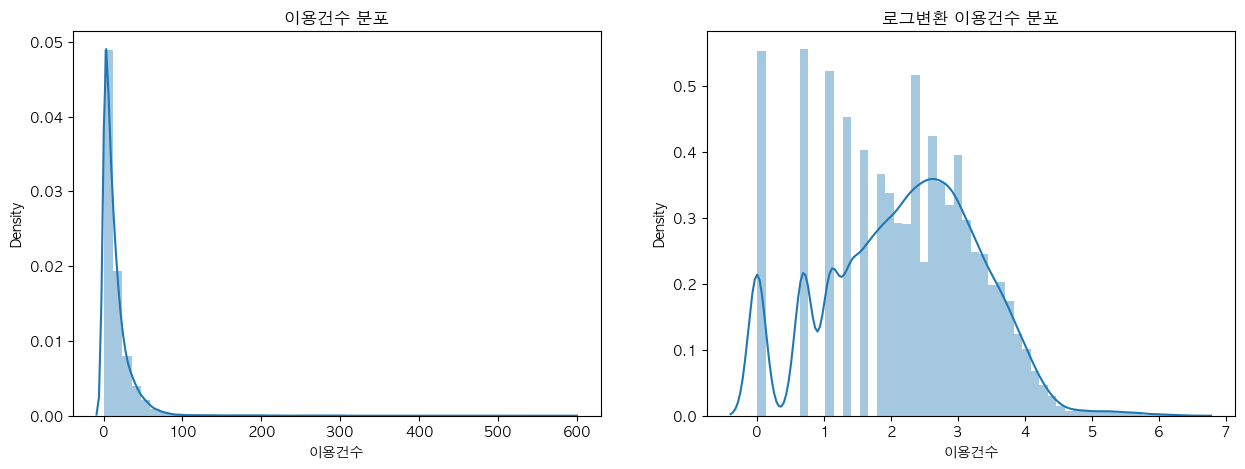

In [20]:
### 타깃값 분포 확인
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(df['이용건수'], ax=axes[0])
sns.distplot(np.log1p(df['이용건수']), ax=axes[1])

axes[0].set_title('이용건수 분포')
axes[1].set_title('로그변환 이용건수 분포')

plt.show()

In [21]:
# 이용건수 왜도 및 첨도 확인
print(df['이용건수'].skew(), df['이용건수'].kurt())

8.079182323164055 108.55171570637788


In [22]:
# 로그변환 이용건수 왜도 및 첨도 확인
print(np.log1p(df['이용건수']).skew(), np.log1p(df['이용건수']).kurt())

-0.14050912277333197 -0.34420921324624887


-> 로그변환을 했지만 정규분포를 따른다고 하기는 어렵다. 하지만 변환 전보다 확실히 분포가 나아졌기에 예측 시 타깃값은 로그변환을 하도록 한다.

<br>
<br>

### 피처 엔지니어링

<br>**OLS 회귀분석을 통해 여러 가지 통계량 살펴보기**
- R-squared: 결정계수, 전체 데이터 중 해당 회귀모델이 설명할 수 있는 데이터의 비율로, 회귀식의 설명력을 나타냄 (1에 가까울수록 성능이 좋음)
- t: t-test, 독립변수와 종속변수 사이의 상관관계로, 값이 클수록 상관도가 큼
- p-value(P > |t|): 독립변수들의 유의 확률로, 독립변수가 종속변수에 영향을 미친다는 가정이 유의하다는 것을 알려줌 (0.05보다 작아야 유의미)
- Cond. No:	다중공선성 검정으로, 독립변수간 상관관계가 있는지 보는 것이며, 10이상이면 다중공선성이 있다고 판단

In [23]:
# OLS 회귀분석에서 컬럼명 오류 문제 해결
ols_df = df.copy()
ols_df.columns = ['시간대', '기온', '강수량', '풍속', '습도', '적설', '미세먼지농도', '대여소번호', '이용건수', '대여월', '평일']

In [24]:
# 타깃값으로 로그 변환한 이용건수를 사용
ols_df['로그변환이용건수'] = np.log1p(ols_df['이용건수'])

In [25]:
### OLS 회귀분석 (C는 범주형 변수 처리)
import statsmodels.formula.api as smf

ols = smf.ols('로그변환이용건수 ~ C(시간대) + C(대여소번호) + C(대여월) + C(평일) + 기온 + 강수량 + 풍속 + 습도 + 적설 + 미세먼지농도 + 0', data=ols_df).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:               로그변환이용건수   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     1604.
Date:                Sun, 26 May 2024   Prob (F-statistic):               0.00
Time:                        12:45:38   Log-Likelihood:                -44167.
No. Observations:               43800   AIC:                         8.844e+04
Df Residuals:                   43749   BIC:                         8.888e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
C(시간대)[1]            1.0109      0.030  

-> 대여소(25, 1854, 2349, 3642)들을 제외하면 변수들의 p-value가 0.05보다 작으므로 통계적으로 유의미하다고 할 수 있다.
<br>-> 다중공선성이 발생한다는 경고가 뜨는데 여기에 대해서 조금 더 알아보기로 한다.

<br>**다중공선성 확인**
- 다중공선성: 회귀분석에서 독립 변수들 간에 높은 상관관계가 있는 경우 발생, 다중공선성이 발생하면 과적합이 발생해 모델의 안정성과 해석력을 해칠 수 있음
- 분산팽창계수(Variance Inflation Factor, VIF): 다중공선성을 평가하는 데에 사용되는 지표로, 각 독립 변수의 설명력이 다른 독립 변수들과 어떻게 상호작용하는지를 나타냄 (일반적으로 VIF 값이 10을 초과하는 경우 다중공선성의 증거로 간주)

In [26]:
### 원핫인코딩 (범주형 변수에 대해, 해당 변수의 범주 개수만큼의 새로운 변수로 쪼개어 0과 1 값을 할당 -> 모델이 학습할 수 있도록)
# drop_first=True: 기준이 되는 첫번째 범주에 대해서는 생성하지 않음
oed_df = pd.get_dummies(data = df, columns = ['대여소번호', '시간대', '대여월'], drop_first=True, dtype=int)

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(oed_df.values, i) for i in range(oed_df.shape[1])]
vif['features'] = oed_df.columns
vif = vif.sort_values('VIF Factor', ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,19.406708,기온(°C)
1,17.392074,습도(%)
2,8.516073,풍속(m/s)
3,6.129124,대여월_8
4,6.029804,대여월_7
5,4.975123,대여월_9
6,4.856546,대여월_6
7,3.939134,대여월_5
8,3.299441,시간대_3
9,3.295868,대여월_10


-> 기온과 습도에서 다중공선성이 발생하는 것으로 예상된다. 그러나 그 수치가 심각하게 크지 않기 때문에 제거하지 않는다. (실제로 제거 시 성능이 떨어졌고, 릿지와 라쏘 등 규제기법을 적용한 모델을 사용했을 때도 크게 성능이 오르지 않았음)

<br>
<br>

### 모델링

<br>**0. 훈련 데이터, 테스트 데이터 구분**

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
train_set, test_set = train_test_split(oed_df, test_size = 0.3, random_state=42)
train_set.shape, test_set.shape

((30660, 51), (13140, 51))

In [32]:
# 학습 데이터
X_train = train_set.loc[:, train_set.columns != '이용건수'].reset_index(drop=True)
y_train = np.log1p(train_set['이용건수']).reset_index(drop=True)

# 예측 데이터
X_test = test_set.loc[:, train_set.columns != '이용건수'].reset_index(drop=True)
y_test = np.log1p(test_set['이용건수']).reset_index(drop=True)

<br><br>**1. Linear Regression**

In [33]:
### 모델 생성 및 훈련
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
### 예측
lr_pred = lr.predict(X_test)

In [35]:
### 평가
mse = mean_squared_error(y_test, lr_pred)
rmse = np.sqrt(mse)
r_square = r2_score(y_test, lr_pred)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R-squared : {0:.3f}'.format(r_square))

MSE : 0.439, RMSE : 0.663
R-squared : 0.652


-> r^2을 보면 독립변수가 종속변수를 65% 정도 설명한다고 말할 수 있다.

<br>**2. 랜덤 포레스트 회귀 모델**
- 훈련 데이터를 랜덤으로 샘플링한 모델 n개를 각각 훈련하여 결과를 평균하는 방법
<br>-> 여러 개의 작은 결정 트리를 만들어 그것들이 예측한 값들의 평균값을 최종 예측 값으로 정하는 것

- 일반적으로 단순 선형회귀 모델보다 정확도가 높으며, 변수의 중요도를 알 수 있으므로 랜덤 포레스트를 사용해 봄

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [52]:
### 모델 생성 및 훈련
rf = RandomForestRegressor()

# 그리드서치 객체 생성
rf_params = {'random_state': [42], 
             'n_estimators' : [100, 300, 600, 800]} #결정 트리의 개수

grid_rf = GridSearchCV(estimator=rf, param_grid=rf_params, cv=5)

# 그리드서치 수행
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 300, 600, 800],
                         'random_state': [42]})

In [53]:
# 최적 하이퍼파라미터 출력
print('최적 하이퍼파라미터 :', grid_rf.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 800, 'random_state': 42}


In [54]:
### 예측
rf_pred = grid_rf.best_estimator_.predict(X_test)

In [55]:
### 평가
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
r_square = r2_score(y_test, rf_pred)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R-squared : {0:.3f}'.format(r_square))

MSE : 0.312, RMSE : 0.558
R-squared : 0.753


-> r^2을 보면 독립변수가 종속변수를 75% 정도 설명한다고 말할 수 있다. 확실히 단순 선형회귀 모델보다 높은 수치이고, 오차도 줄었기에 성능이 향상되었다고 볼 수 있다. 따라서 랜덤 포레스트를 이용해 수요 예측을 진행하기로 한다.

<br>

**변수 중요도 확인**

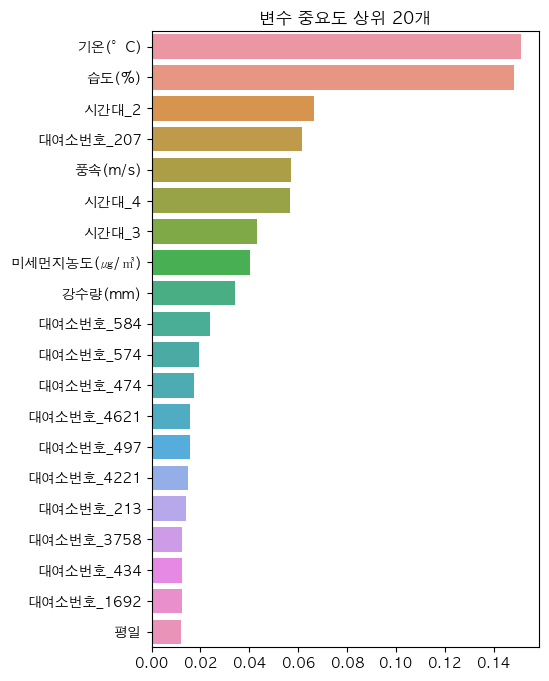

In [64]:
# 랜덤 포레스트 기반 변수 중요도 
feature_imp = grid_rf.best_estimator_.feature_importances_
feature_imp = pd.Series(feature_imp, index=X_train.columns).sort_values(ascending=False)[:20] #중요도 상위 20개

# 시각화
plt.figure(figsize=(5, 8))
plt.title('변수 중요도 상위 20개')
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()

-> 예상대로 날씨가 따릉이 대여에 많은 영향을 미치는 것 같다. 특히 기온과 습도가 따릉이 수요에 가장 큰 영향을 미치는 변수인 듯 하다. 시간대, 풍속, 미세먼지농도, 강수량 등도 다른 변수들에 비해 영향을 많이 미치고 있다.

<br>
<br>

### 따릉이 총 수요 예측
- 반납 데이터에 대해서도 랜덤 포레스트 모델을 이용해 예측 모델을 생성하고, 반납건수를 예측
- 대여소/시간대/날씨에 따라 대여건수와 반납건수를 각각 예측한 후, 반납건수-대여건수를 계산해서 따릉이 총 수요를 예측

<br>**반납건수 예측모델 생성** (아직 안했어용)

In [57]:
# 반납 데이터 로드
bike_return = pd.read_csv('2023 따릉이 반납 및 날씨 데이터.csv', encoding='cp949', index_col=0)

In [58]:
bike_return

,시간대,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),미세먼지농도(㎍/㎥),대여소번호,반납건수,반납월,평일
0,1,1.300000,0.0,1.766667,70.833333,0.000000,76.833333,162,2,1,0
1,1,1.300000,0.0,1.766667,70.833333,0.000000,76.833333,207,10,1,0
2,1,1.300000,0.0,1.766667,70.833333,0.000000,76.833333,213,2,1,0
3,1,1.300000,0.0,1.766667,70.833333,0.000000,76.833333,434,0,1,0
4,1,1.300000,0.0,1.766667,70.833333,0.000000,76.833333,474,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
43795,4,1.916667,0.0,1.250000,93.333333,2.416667,25.000000,3758,4,12,0
43796,4,1.916667,0.0,1.250000,93.333333,2.416667,25.000000,4009,2,12,0
43797,4,1.916667,0.0,1.250000,93.333333,2.416667,25.000000,4221,0,12,0
43798,4,1.916667,0.0,1.250000,93.333333,2.416667,25.000000,4591,1,12,0


In [ ]:
# 반납 데이터 정제

In [ ]:
# 랜덤 포레스트 모델 생성 및 훈련

In [ ]:
# 예측

In [ ]:
# 평가

<br>**총 수요 예측**
<br>- 앞서 만들었던 랜덤 포레스트 모델을 활용해 총 예상 수요(예상 반납건수 - 예상 대여건수)를 계산
- 대여소 - 574번 아차산역4번출구 (반납-대여 불균형이 가장 심한 대여소)
- 시간대 - 평일: 1(평일) / 월: 5월 / 시간대: 3(12~17시)
- 날씨 - 기온: 20도 / 강수량: 0mm / 풍속: 0.6m/s / 습도: 70% / 적설: 0cm / 미세먼지농도: 60㎍/㎥

In [59]:
X_train.columns

Index(['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)', '미세먼지농도(㎍/㎥)', '평일',
       '대여소번호_207', '대여소번호_213', '대여소번호_434', '대여소번호_474', '대여소번호_497',
       '대여소번호_574', '대여소번호_584', '대여소번호_623', '대여소번호_711', '대여소번호_720',
       '대여소번호_725', '대여소번호_1126', '대여소번호_1175', '대여소번호_1199', '대여소번호_1428',
       '대여소번호_1430', '대여소번호_1692', '대여소번호_1854', '대여소번호_1924', '대여소번호_2349',
       '대여소번호_2405', '대여소번호_2712', '대여소번호_3513', '대여소번호_3642', '대여소번호_3758',
       '대여소번호_4009', '대여소번호_4221', '대여소번호_4591', '대여소번호_4621', '시간대_2',
       '시간대_3', '시간대_4', '대여월_2', '대여월_3', '대여월_4', '대여월_5', '대여월_6', '대여월_7',
       '대여월_8', '대여월_9', '대여월_10', '대여월_11', '대여월_12'],
      dtype='object')

In [60]:
# 대여건수 예측 모델에 넣을 데이터
new_data = [[20, 0, 0.6, 70, 0, 60, 1, 
             0, 0, 0, 0, 0, 
             1, 0, 0, 0, 0, 
             0, 0, 0, 0, 0,
             0, 0, 0, 0, 0,
             0, 0, 0, 0, 0,
             0, 0, 0, 0, 0,
             1, 0, 0, 0, 0, 1, 0, 0,
             0, 0, 0, 0, 0,]]

# 데이터프레임으로 변환
col_names = X_train.columns
new_data_df = pd.DataFrame(new_data, columns=col_names)
new_data_df.T

,0
기온(°C),20.0
강수량(mm),0.0
풍속(m/s),0.6
습도(%),70.0
적설(cm),0.0
미세먼지농도(㎍/㎥),60.0
평일,1.0
대여소번호_207,0.0
대여소번호_213,0.0
대여소번호_434,0.0


In [62]:
# 대여건수 예측
rental_pred = grid_rf.best_estimator_.predict(new_data_df)

# 대여건수 예측 결과 (로그변환된 상태로 나오기 때문에 다시 지수로 변환)
rental_result = round(np.expm1(rental_pred)[0])

In [63]:
print('따릉이 예상 대여건수는 {}대 입니다.'.format(rental_result))

따릉이 예상 대여건수는 26대 입니다.
